In [25]:
import matplotlib.pyplot as plt
import numpy as np
import librosa as lr
import librosa.display as lrd
from mir_eval.separation import bss_eval_sources


In [26]:
# load a file
x, sr = lr.load(lr.util.example_audio_file())

# create some noise
n = np.random.rand(*x.shape) * 0.5

# mix signal + noise
xn = x + n

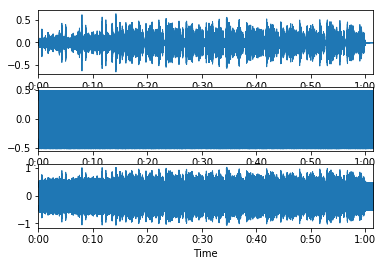

In [27]:
# plot all of the above
plt.figure()
plt.subplot(3, 1, 1)
lrd.waveplot(x, sr=sr)

plt.subplot(3, 1, 2)
lrd.waveplot(n, sr=sr)

plt.subplot(3, 1, 3)
lrd.waveplot(xn, sr=sr)

In [43]:
# create estimated signal (add noise)
x2 = x + np.random.randn(*x.shape) * 0.001

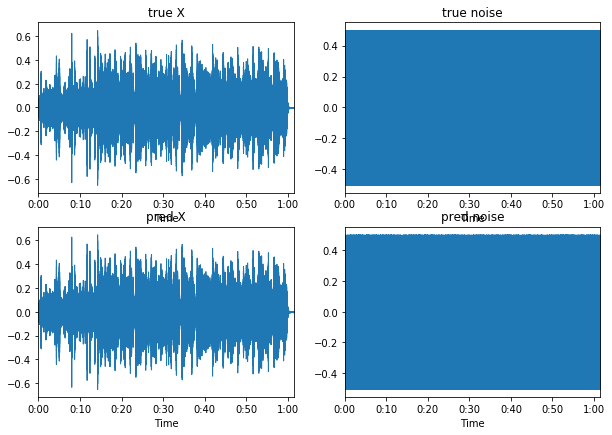

In [44]:
# pack into matrices
sig_true = np.array([x, xn-x])
sig_pred = np.array([x2, xn-x2])

# plot signals
plt.figure()
plt.subplot(2, 2, 1); lrd.waveplot(sig_true[0], sr=sr); plt.title('true X')
plt.subplot(2, 2, 2); lrd.waveplot(sig_true[1], sr=sr); plt.title('true noise')
plt.subplot(2, 2, 3); lrd.waveplot(sig_pred[0], sr=sr); plt.title('pred X')
plt.subplot(2, 2, 4); lrd.waveplot(sig_pred[1], sr=sr); plt.title('pred noise')
plt.subplots_adjust(left=0.2, right=1.5, bottom=0.2, top=1.5)


In [45]:
# extract metrics
sdr, sir, sar, perm = bss_eval_sources(sig_true, sig_pred)
# print metrics
print('SDR: ', sdr)
print('SIR: ', sir)
print('SAR: ', sar)


SDR:  [40.68200069 49.2147922 ]
SIR:  [75.04356515 83.49139689]
SAR:  [40.68359196 49.21641479]
